In [1]:
import os, sys
os.getcwd()
sys.path.append(os.getcwd()+"/../..")

import numpy as np
import pandas as pd

import Ensembler.src.potentials.OneD as pot
import Ensembler.src.system as system
import Ensembler.src.conveyorBelt as cvb
import Ensembler.src.integrator as integ

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
STATES ARE BIIG


In [12]:
numsys = 8
steps = 1000

integrat = integ.metropolisMonteCarloIntegrator()
potial = pot.pertHarmonicOsc(fc=1.0, alpha=10.0, gamma=0.0)
syst = system.perturbedSystem(potential=potial , integrator=integrat)

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
STATES ARE BIIG


In [13]:
ens=cvb.ConveyorBeltEnsemble(0.0, numsys, system=syst, build=False)


In [14]:
ens.propagate()
ens

0      0.02     2.379
1      0.23     7.365
2      0.48     8.523
3      0.73    36.312
4      0.98    12.073
5      0.77    16.613
6      0.52     9.223
7      0.27     5.053

In [15]:
ens.traj_clear()
systrajs, traj=cvb.calc_traj(steps=steps, ens=ens)

Rejected  487


In [16]:
traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
traj.head()

,Step,CapLam,Energy,Bias
0,0.0,6.226693,97.540068,0.0
1,1.0,6.226693,97.540068,0.0
2,2.0,6.069562,102.248957,0.0
3,3.0,6.069562,102.248957,0.0
4,4.0,6.277529,119.018825,0.0


In [17]:
print(systrajs[0])

[[array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]
 [array([[-2.48304885]]) 298.0 3.082765795130262 3.082765795130262 nan
  nan nan 0.0 nan]]


In [35]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in range(numsys):
    for j in range(systrajs[:,i,:].shape[0]):
        index=int(np.floor(systrajs[j,i,7]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[j, i, 8]
dhdlbins/=bins
dhdlbins

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

Integral =  nan


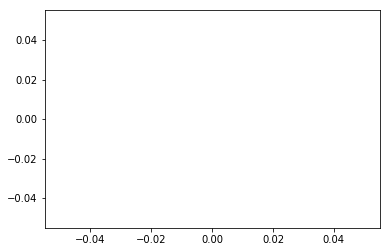

In [34]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

(0.14, 0.185)

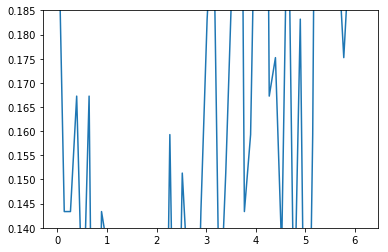

In [32]:
h1=np.histogram(traj.CapLam, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

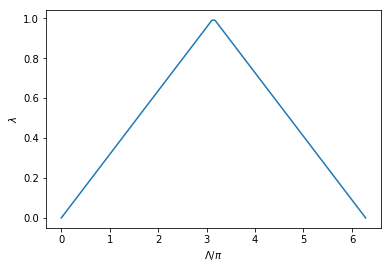

In [33]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [36]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


In [37]:
#import plotEnsembler
import Ensembler.visualisation.plotConveyorBelt as plotEnsembler


lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

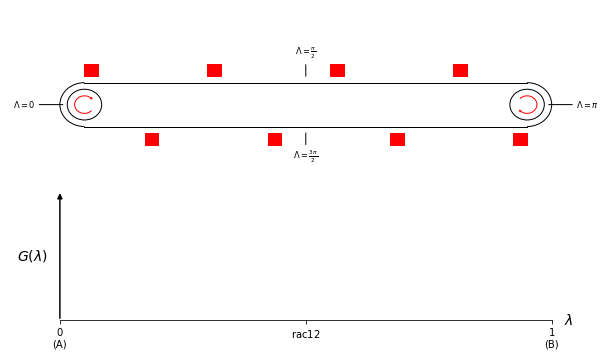

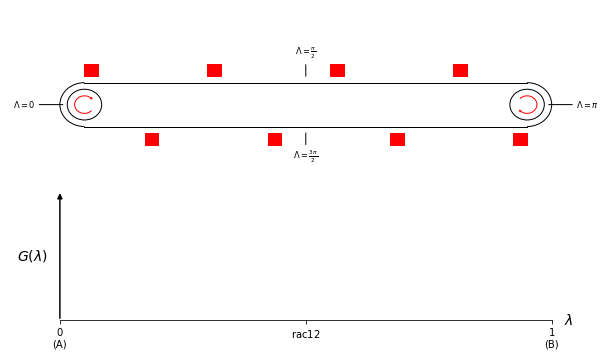

In [38]:
plotEnsembler.drawEnsembler(lam, ene, CapLam=0.2, M=8)

In [39]:
from ipywidgets import interact, interactive, fixed, widgets
import ipywidgets
from matplotlib import pylab

In [40]:
def plotCVB(CapLam, M):
    fig = plotEnsembler.drawEnsembler(lam, ene, CapLam=CapLam, M=M)
    plt.show()

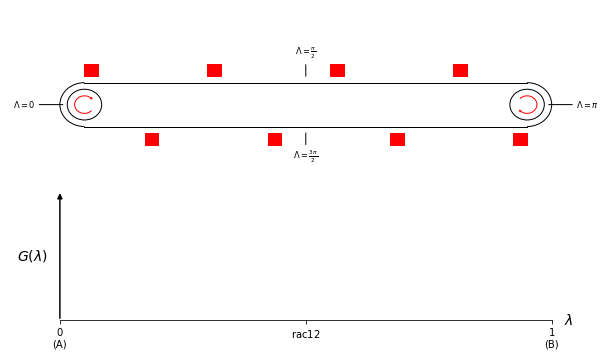

In [41]:
%matplotlib inline
plotCVB(0.2, 8)

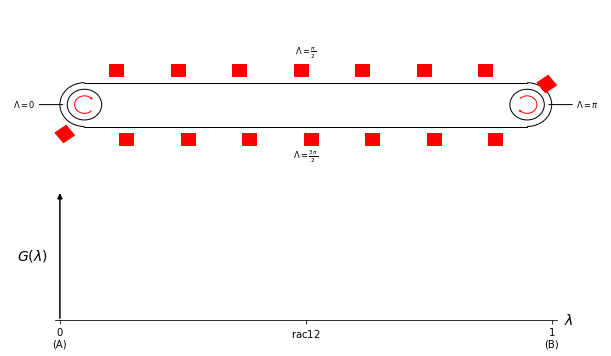

<function __main__.plotCVB(CapLam, M)>

In [42]:
interact(plotCVB, CapLam=(0, 2*np.pi, 0.01*np.pi), M=(2, 32, 2))